<a href="https://colab.research.google.com/github/pkboom/metacode-machine-learning/blob/master/%5Bpractice%5D_Ensemble_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/curinc/ensemble

/content/drive/MyDrive/curinc/ensemble


# Ensemble 모델

## [P.1] Bagging 모델

먼저, 결정 트리 기반의 bagging 알고리즘을 구현할 것임

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [5]:
X, y = make_moons(n_samples=1000, noise=0.50)
# get train, test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

결정 트리를 기반으로 하기 때문에 이전의 `DecisionTreeClassifier` 클래스를 [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)로 감싸서 모델을 구현함

In [6]:
from sklearn.tree import DecisionTreeClassifier  # 결정 트리 분류 모델
from sklearn.ensemble import BaggingClassifier  # 결정 트리 분류 모델

n_estimators: number of estimators

In [7]:
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, max_samples=0.5, random_state=42)

# Train 데이터 학습
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.84

위의 성능을 단순한 결정 트리 모델 성능과 비교해보기

In [9]:
# 결정 트리 모델로만 성능을 얻어보기!
print(X_test)

tree_clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

accuracy_score(y_pred, y_test)


[[-9.43102996e-01  2.26231647e-01]
 [ 9.89844182e-01 -3.94231858e-01]
 [ 8.06706180e-01  1.02672351e+00]
 [-1.22992170e+00  8.53475117e-01]
 [-7.87346026e-01  1.00791715e+00]
 [ 1.18833099e+00  5.52824776e-01]
 [ 1.91299746e-01  1.67305652e-02]
 [-3.27941883e-02  1.27152850e+00]
 [ 2.15170332e+00 -1.37512936e-01]
 [-1.86241944e-01  1.67269652e+00]
 [ 6.04238725e-01  4.86662001e-01]
 [ 3.40545150e-01  1.64194501e+00]
 [ 2.53978042e+00 -2.77787846e-01]
 [-1.77536406e-01  3.07032686e-01]
 [-5.93987187e-01  1.21783046e+00]
 [-1.81850350e-02  5.13104484e-01]
 [ 5.43047909e-01  2.29318474e-01]
 [ 9.20938141e-01 -8.31148776e-01]
 [ 4.38567900e-01  7.79134630e-01]
 [ 8.28049688e-01 -5.76923281e-01]
 [ 1.21727330e+00  1.92907812e-01]
 [ 6.12199561e-01 -1.05205362e+00]
 [ 1.59760752e+00  1.61869230e-01]
 [ 1.55760896e+00  3.45282888e-01]
 [ 3.68853807e-01  8.88111273e-01]
 [ 6.21600231e-01  6.75886594e-01]
 [ 9.87541459e-01 -1.43490908e+00]
 [-7.89729347e-01  1.82824150e+00]
 [ 1.39351442e+00 -4

0.8

학습된 두 모델의 시각화를 해보면 다음과 같음


In [10]:
def plot_dataset(X, y, show=True):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "o")
    
    if show:
        plt.show()

In [11]:
def plot_decision_boundary(clf, axes=None):
    if axes is None:
        x0 = np.linspace(-3, 4, 100)
        x1 = np.linspace(-3, 4, 100)
    else:
        x0 = np.linspace(axes[0][0], axes[0][1], 100)
        x1 = np.linspace(axes[1][0], axes[1][1], 100)
        
    
    x0, x1 = np.meshgrid(x0, x1)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, alpha=0.25)
    plt.show()

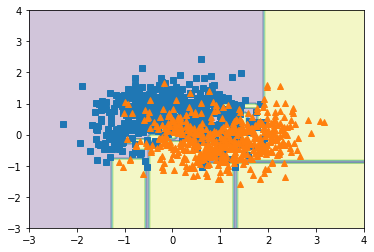

In [12]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(tree_clf)

plt.show()

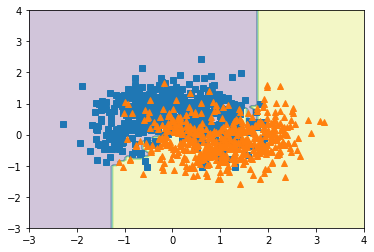

In [13]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(bag_clf)

plt.show()

확실히 결정 경계가 더 단순해진 것을 통해, 여러 트리의 앙상블로 분산 오류가 줄어든 것을 볼 수 있음

## [P.2] Random Forest 모델

트리 모델 간의 상관 관계를 줄여 앙상블 효과를 극대화하는 Random Forest 모델을 구현하고 성능을 평가해볼 것임     
사이킷런에서 제공하는 [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 클래스를 사용하면 됨

In [22]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16)

rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

accuracy_score(y_pred, y_test)

0.86

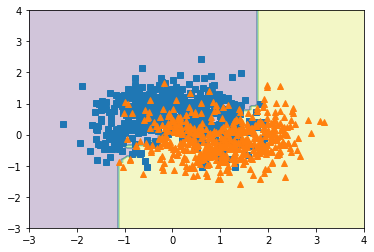

In [23]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(rnd_clf)

plt.show()

Bagging tree의 장점은 각 피처들의 중요도를 계산해, 모델에 대한 설명가능성을 키워줄 수 있음    

In [25]:
rnd_clf.feature_importances_

array([0.43100334, 0.56899666])

In [ ]:
from sklearn.datasets import load_iris

# iris 데이터셋 전체를 학습한 이후에, 각 피처에 대한 중요도를 뽑아주세요.
# load_iris()['feature_names'] 활용
####################



####################

## [P.3] AdaBoost 모델

이번에는 Boosting 알고리즘인 `AdaBoost`를 활용해 모델을 구현해볼 것임     
사이킷런에서 제공하는 [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) 클래스를 사용하면 쉽게 구현 가능함     

In [ ]:
from ??? import ???

ada_clf = ???

# 이전과 똑같이 학습 및 평가해주세요.
####################



####################

In [ ]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(ada_clf)

plt.show()

### Q1. Bagging과 Boosting의 차이가 무엇일까요?

### Q2. AdaBoost에서 `DecisionTreeClassifier`의 `max_depth` argument를 1로 설정해준 이유는?

### Q3. AdaBoost 모델이 만약 학습 데이터셋에 underfit된 상황이라면, 어떤 하이퍼파라미터를 사용할 수 있을까요?